In [90]:
last_years_talks = [
    {
        "speaker_name": "CO Pilot",
        "title": "The Power of the Shell",
        "content": "The shell is a powerful tool that can help you automate tasks, manage your system, and more. In this talk, we'll cover the basics of the shell, how to write shell scripts, and some useful tips and tricks to help you get the most out of the shell."
    },
    {
        "speaker_name": "Kyle Nickerson",
        "title": "Embeddings: A key component for modern AI",
        "content": "Embeddings are an important tool for representing data, both for data visualization and for use in modern AI. In this talk, we will explore the evolution of embeddings, their critical role in data visualization, and their application in Retrieval-Augmented Generation (RAG) within chat systems. Additionally, I’ll discuss multi-modal embeddings that enable models to process multiple data types, such as text and images."
    },
    {
        "speaker_name": "Shawn Chen",
        "title": "From Web to Mobile Development",
        "content": "Explore how React Native seamlessly extends our web development skills to mobile app development. Uncover the inner workings of React Native, its advantages, and how it leverages a unified codebase and shared libraries. Additionally, delve into the challenges faced as a React Native developer and discover effective mitigation strategies."
    },
    {
        "speaker_name": "Lesley Chard",
        "title": "Design Thinking for Developers",
        "content": "Unlock the power of innovation with Design Thinking for Developers. Geared toward engineers eager to enhance their problem-solving skills, this session offers a comprehensive introduction to the principles of design thinking. Through this talk, participants will explore the iterative process of empathizing, defining, ideating, prototyping, and testing—a proven methodology to foster creative solutions. Get ready to unleash your creative potential and revolutionize your problem-solving approach!"
    },
    {
        "speaker_name": "Meagan Campbell",
        "title": "Intro to Technical Writing",
        "content": "A crash course in becoming a better writer. Even if you never plan to be a full-time writer, intentionally improving your writing skills is a powerful career move. Becoming a stronger writer helps make you a stronger developer, a stronger teammate, and a stronger candidate for whatever opportunities your future may hold. This session will cover an overview of technical writing and different types of writing in SaaS, tips to improve your writing (with examples), and helpful resources you can explore on your own."
    },
    {
        "speaker_name": "Sushmitha Batchu",
        "title": "Demystifying Prompt Engineering",
        "content": "Prompt engineering is the process of structuring text that can be interpreted and understood by a generative AI model, such as ChatGPT. We'll explore what it is, why it's crucial to learn, the benefits it brings, and some practical tips. I firmly believe that mastering this skill can supercharge our ability to use AI effectively, create user-friendly software, stay ethical, and stay ahead in the ever-changing world of AI-powered technology. This talk will cover What is Prompt and Prompt Engineering, Elements of Prompt, Prompt Parameters and Their Significance, Use Cases, Prompting Techniques, and Tips for Crafting Effective Prompts."
    },
    {
        "speaker_name": "Mitchell Hynes",
        "title": "Intro to GitHub and Open Source",
        "content": "In this presentation, Mitch will cover the differences between Git and GitHub and what role they play in Open Source Software at large. Including the dos-and-don'ts of collaborating on GitHub, how to find a project to contribute to, and what contributing looks like from an Open Source Maintainer's perspective."
    },
    {
        "speaker_name": "Tim Oram",
        "title": "Levelling up Git Rebase",
        "content": "When working with Git, the rebase command is often stated as being an alternative to Git merge. While this is true in the basic sense, this is only scratching the surface of what Git rebase provides. Even when using a merge-based workflow, I believe there are features of Git rebase that could still be very useful in your toolbox of source control tools. This talk will run through what exactly Git rebase is, as well as some expanded functionality."
    },
    {
        "speaker_name": "Jack Harrhy",
        "title": "Modern Server side Web Dev",
        "content": "Navigating the many methods available and considerations to be made while deploying a website in 2023. The web has existed in some form for the last three decades, and while some of its core remains the same, plenty has changed. Initially, since the browser was simple, most of the interesting dynamic nature of websites came from the server, but as JavaScript become more powerful, and people realized maybe doing more on the client would be better, the server in some cases is only responsible for shooting a small index.html alongside megabytes of JavaScript at the client. However, the bleeding edge of current modern web frameworks is rethinking this approach, and the pendulum is swinging back in the direction of the server, but with an interesting twist."
    }
]


## Show an example

In [91]:
from IPython.display import display, Markdown

a_talk = last_years_talks[0]

display(Markdown(f"### {a_talk['title']}"))
display(Markdown(f"_by {a_talk['speaker_name']}_"))
# print("\n") 
display(Markdown(a_talk['content']))

### The Power of the Shell

_by CO Pilot_

The shell is a powerful tool that can help you automate tasks, manage your system, and more. In this talk, we'll cover the basics of the shell, how to write shell scripts, and some useful tips and tricks to help you get the most out of the shell.

### Talk summary df

In [92]:
import pandas as pd


talk_summary_df = pd.DataFrame(last_years_talks)

In [93]:
talk_summary_df.head()

,speaker_name,title,content
0,CO Pilot,The Power of the Shell,The shell is a powerful tool that can help you...
1,Kyle Nickerson,Embeddings: A key component for modern AI,Embeddings are an important tool for represent...
2,Shawn Chen,From Web to Mobile Development,Explore how React Native seamlessly extends ou...
3,Lesley Chard,Design Thinking for Developers,Unlock the power of innovation with Design Thi...
4,Meagan Campbell,Intro to Technical Writing,A crash course in becoming a better writer. Ev...


In [94]:
import os
from openai import OpenAI

from dotenv import load_dotenv
load_dotenv()

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

In [95]:
EMBEDDING_MODEL = "text-embedding-3-small"
BATCH_SIZE = 100  # you can submit up to 2048 embedding inputs per request

embeddings = []
for batch_start in range(0, len(talk_summary_df), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE

    batch = talk_summary_df.content[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response.data):
        assert i == be.index  # double check embeddings are in same order as input
    batch_embeddings = [e.embedding for e in response.data]
    embeddings.extend(batch_embeddings)

talk_summary_df["embedding"] = embeddings


Batch 0 to 99


In [96]:
talk_summary_df.head()

,speaker_name,title,content,embedding
0,CO Pilot,The Power of the Shell,The shell is a powerful tool that can help you...,"[0.026558618992567062, 0.02382306009531021, 0...."
1,Kyle Nickerson,Embeddings: A key component for modern AI,Embeddings are an important tool for represent...,"[0.02492578700184822, 0.02065279521048069, 0.0..."
2,Shawn Chen,From Web to Mobile Development,Explore how React Native seamlessly extends ou...,"[-0.0065011088736355305, 0.011018184013664722,..."
3,Lesley Chard,Design Thinking for Developers,Unlock the power of innovation with Design Thi...,"[0.022167742252349854, 0.0029427765402942896, ..."
4,Meagan Campbell,Intro to Technical Writing,A crash course in becoming a better writer. Ev...,"[-0.010334030725061893, 0.02384312078356743, 0..."


In [97]:
talk_title_embeddings = []

# embeddings = []
# for batch_start in range(0, len(talk_summary_df), BATCH_SIZE):
#     batch_end = batch_start + BATCH_SIZE

#     batch = talk_summary_df.content[batch_start:batch_end]
#     print(f"Batch {batch_start} to {batch_end-1}")
#     response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
#     for i, be in enumerate(response.data):
#         assert i == be.index  # double check embeddings are in same order as input
#     batch_embeddings = [e.embedding for e in response.data]
#     embeddings.extend(batch_embeddings)

# talk_summary_df["embedding"] = embeddings

for batch_start in range(0, len(talk_summary_df), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE

    batch = talk_summary_df.title[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response.data):
        assert i == be.index  # double check embeddings are in same order as input
    batch_embeddings = [e.embedding for e in response.data]
    talk_title_embeddings.extend(batch_embeddings)

talk_summary_df["title_embedding"] = talk_title_embeddings

Batch 0 to 99


In [98]:
talks_and_titles = talk_summary_df['title'].tolist() + talk_summary_df['content'].tolist()
talks_and_titles_embeddings = talk_summary_df['title_embedding'].tolist() + talk_summary_df['embedding'].tolist()

In [99]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE   

# PLOTLY

import plotly.express as px

pca = PCA(n_components=2)
pca_result = pca.fit_transform(talks_and_titles_embeddings)

tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)


# plot

talks_and_titles_df = pd.DataFrame(talks_and_titles, columns=['text'])
talks_and_titles_df['tsne-2d-one'] = tsne_results[:,0]
talks_and_titles_df['tsne-2d-two'] = tsne_results[:,1]

fig = px.scatter(
    talks_and_titles_df, x="tsne-2d-one", y="tsne-2d-two",
    hover_data=["text"]
)

fig.show()


[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.001s...
[t-SNE] Computed neighbors for 18 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.210611
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.622192
[t-SNE] KL divergence after 300 iterations: 1.298760


In [28]:
sentances = []
for talk in last_years_talks:
    sentances.append({'content': talk['title'], 'author': talk['speaker_name']})
    for sentence in talk['content'].split('. '):
        sentances.append({'content': sentence, 'author': talk['speaker_name']})

sentances_df = pd.DataFrame.from_records(sentances)

In [30]:
sentances_df.head()

,content,author
0,From Web to Mobile Development,Shawn Chen
1,Explore how React Native seamlessly extends ou...,Shawn Chen
2,"Uncover the inner workings of React Native, it...",Shawn Chen
3,"Additionally, delve into the challenges faced ...",Shawn Chen
4,Design Thinking for Developers,Lesley Chard


In [33]:
import plotly.express as px 

sentance_embeddings = []
for batch_start in range(0, len(sentances_df), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE

    batch = sentances_df.content[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response.data):
        assert i == be.index  # double check embeddings are in same order as input
    batch_embeddings = [e.embedding for e in response.data]
    sentance_embeddings.extend(batch_embeddings)

sentances_df["embedding"] = sentance_embeddings

pca = PCA(n_components=2) # similar to t-SNE
pca_result = pca.fit_transform(sentance_embeddings)

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

sentances_df['tsne-2d-one'] = tsne_results[:,0]
sentances_df['tsne-2d-two'] = tsne_results[:,1]


Batch 0 to 99
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 0.156188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.574989
[t-SNE] KL divergence after 300 iterations: 0.248897


In [34]:

fig = px.scatter(
    sentances_df, x="tsne-2d-one", y="tsne-2d-two",
    hover_data=["content", "author"],
    color="author"
)

fig.show()

# What is RAG?

In [35]:
query = "I'd like to better my language skills"

query_embedding = client.embeddings.create(model=EMBEDDING_MODEL, input=query)
query_embedding

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.031226912513375282, -0.014903144910931587, -0.035327959805727005, 0.0019650841131806374, -0.03331764042377472, -0.0005197505233809352, -0.0001999845844693482, 0.0872209221124649, -0.03468465805053711, 0.019232025370001793, -0.021966055035591125, -0.024405239149928093, -0.020786670967936516, 0.0006014195969328284, 0.020076358690857887, 0.03170938789844513, -0.024284619837999344, 0.00852374080568552, 0.017771195620298386, 0.036239299923181534, 0.05299193784594536, -0.03248671069741249, -0.025329984724521637, 0.025691842660307884, 0.06079196557402611, -0.007645902689546347, 0.029189791530370712, 0.017690783366560936, -0.001696204300969839, -0.017141297459602356, 0.017704185098409653, -0.03953621909022331, -0.03843724727630615, 0.01420623529702425, 0.004677335731685162, -0.018213465809822083, 0.008376318030059338, 0.011452102102339268, -0.007129921577870846, -0.051276467740535736, 0.02865370735526085, -0.02210007607936859, 0.04176096990

In [39]:
query_embedding = query_embedding.data[0].embedding

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity


# Compute distances
sentances_df['distance'] = sentances_df['embedding'].apply(lambda x: cosine_distances([query_embedding], [x])[0][0])

# Get the top k sentences with smallest distances
k = 5
top_k = sentances_df.nsmallest(k, 'distance')
top_k


,content,author,embedding,tsne-2d-one,tsne-2d-two,distance
10,A crash course in becoming a better writer,Meagan Campbell,"[-0.030720179900527, 0.028391214087605476, -0....",5.073293,-21.433315,0.599329
12,Becoming a stronger writer helps make you a st...,Meagan Campbell,"[0.023073216900229454, -0.028935875743627548, ...",2.870385,-9.305427,0.677966
11,Even if you never plan to be a full-time write...,Meagan Campbell,"[0.02639438770711422, 0.025916660204529762, 0....",-2.194378,-9.512372,0.684160
16,"We'll explore what it is, why it's crucial to ...",Sushmitha Batchu,"[-0.03420684486627579, 0.043061330914497375, 0...",6.941230,-8.484236,0.707217
17,I firmly believe that mastering this skill can...,Sushmitha Batchu,"[0.022497566416859627, 0.0016994505422189832, ...",9.175625,-11.463681,0.718882


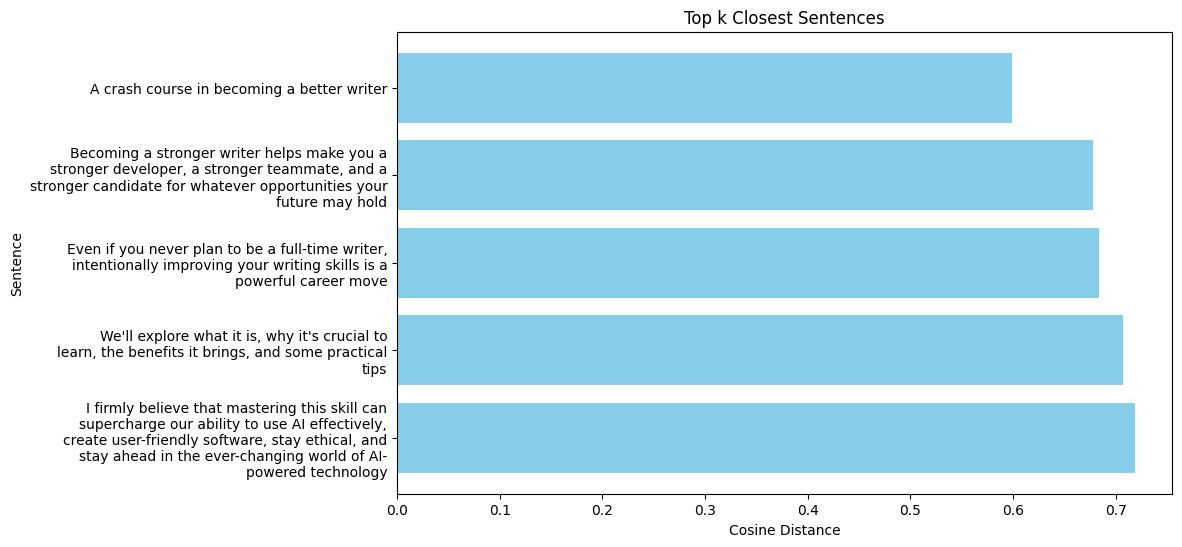

In [52]:

import textwrap

# Wrap the sentences to a fixed width
def wrap_labels(labels, width=50):
    return [textwrap.fill(label, width) for label in labels]

# Apply the wrapping to the content in the top_k DataFrame
wrapped_labels = wrap_labels(top_k['content'])

# Plot the results
plt.figure(figsize=(10, 6))
# plt.barh(top_k['content'], top_k['distance'], color='skyblue')
plt.barh(wrapped_labels, top_k['distance'], color='skyblue')
plt.xlabel('Cosine Distance')
plt.ylabel('Sentence')
plt.title('Top k Closest Sentences')
plt.gca().invert_yaxis()  # Invert y-axis to have the closest sentence on top
plt.show()


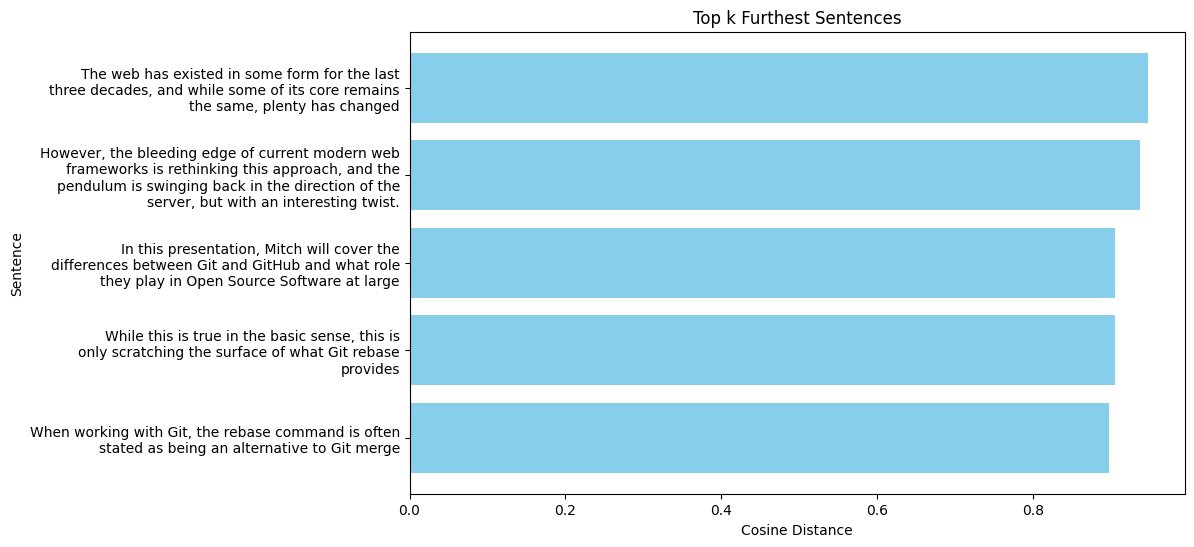

In [50]:
top_k = sentances_df.nlargest(k, 'distance')

wrapped_labels = wrap_labels(top_k['content'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(wrapped_labels, top_k['distance'], color='skyblue')
plt.xlabel('Cosine Distance')
plt.ylabel('Sentence')
plt.title('Top k Furthest Sentences')
plt.gca().invert_yaxis()  # Invert y-axis to have the closest sentence on top
plt.show()

## Cats and Mats

In [86]:
phrases = ["The cat sat on the mat.",
"On the mat, the cat sat.",
"The mat was sat on by the cat.",
"A feline perched itself atop the mat.",
"Sitting quietly, the cat chose the mat as its spot.", 
"The rat sat on the mat.",
"The rat sat on the cat.",
]

phrases_df = pd.DataFrame(phrases, columns=['content'])

phrases_embeddings = []
for batch_start in range(0, len(phrases_df), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE

    batch = phrases_df.content[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response.data):
        assert i == be.index  # double check embeddings are in same order as input
    batch_embeddings = [e.embedding for e in response.data]
    phrases_embeddings.extend(batch_embeddings)

phrases_df["embedding"] = phrases_embeddings

Batch 0 to 99


In [87]:
phrases_df.head()

,content,embedding
0,The cat sat on the mat.,"[-0.02447381056845188, -0.03738884627819061, 0..."
1,"On the mat, the cat sat.","[-0.016323771327733994, -0.011399605311453342,..."
2,The mat was sat on by the cat.,"[-0.00436724629253149, -0.028424352407455444, ..."
3,A feline perched itself atop the mat.,"[-0.016060635447502136, -0.03977558761835098, ..."
4,"Sitting quietly, the cat chose the mat as its ...","[-0.03179492801427841, -0.028860384598374367, ..."


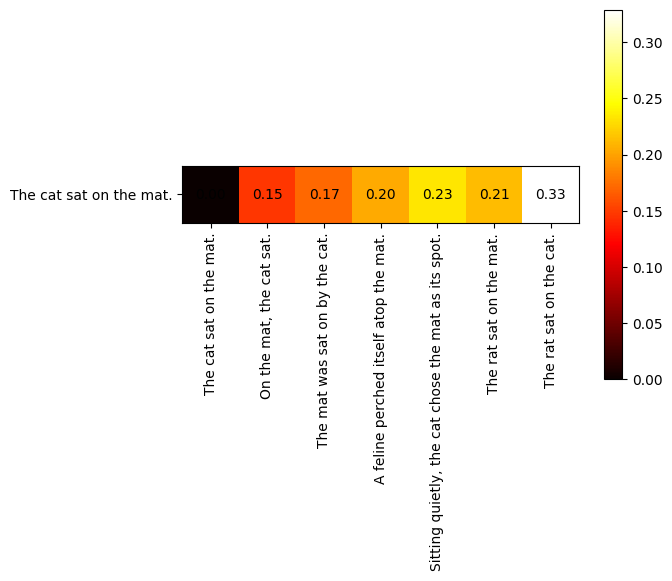

In [88]:

distance_matrix = cosine_distances(phrases_embeddings, phrases_embeddings)

plt.imshow(distance_matrix[:1, :], cmap='hot', interpolation='nearest')
plt.colorbar()
# annotate
for i in range(1):
    for j in range(len(phrases)):
        plt.text(j, i, f"{distance_matrix[i, j]:.2f}", ha='center', va='center', color='black')
plt.xticks(range(len(phrases)), phrases, rotation=90)
plt.yticks(range(1), phrases[:1]);


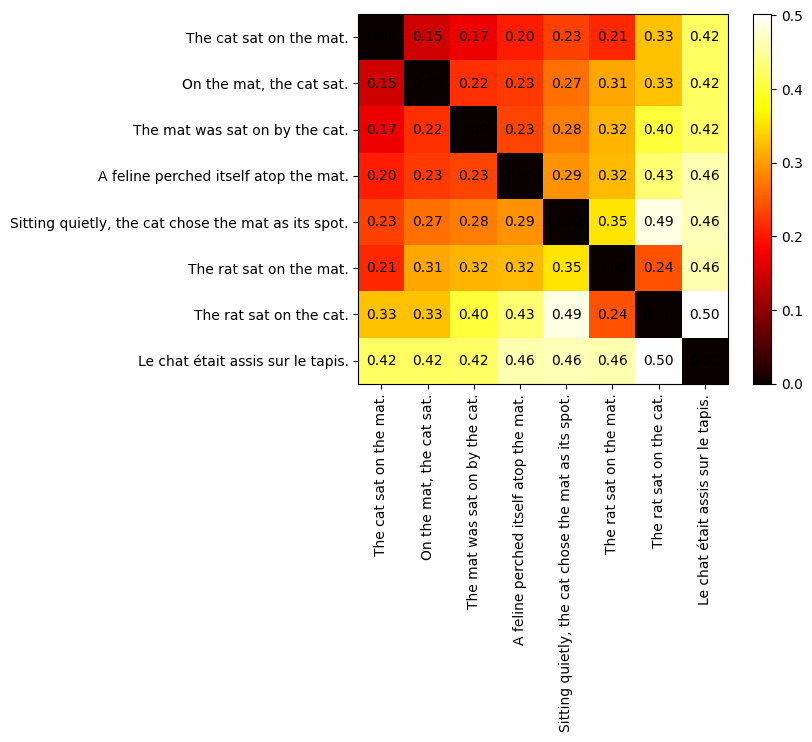

In [85]:

distance_matrix = cosine_distances(phrases_embeddings, phrases_embeddings)

plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
# annotate
for i in range(len(phrases)):
    for j in range(len(phrases)):
        plt.text(j, i, f"{distance_matrix[i, j]:.2f}", ha='center', va='center', color='black')
plt.xticks(range(len(phrases)), phrases, rotation=90)
plt.yticks(range(len(phrases)), phrases);
